In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import PIL
import tensorflow as tf
from keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_dir = "D:/Downloads/archive/chest_xray/train"
training_generator = ImageDataGenerator(rescale = 1/255,width_shift_range=0.15,height_shift_range=0.15,rotation_range=15,
shear_range=0.15,zoom_range=0.15)

train_data = training_generator.flow_from_directory(train_dir, target_size=(120,120), batch_size=16, class_mode='binary',color_mode='rgb')

Found 5216 images belonging to 2 classes.


In [3]:
valid_dir = "D:/Downloads/archive/chest_xray/val"
validation_generator = ImageDataGenerator(rescale = 1/255)
valid_data = validation_generator.flow_from_directory(valid_dir, target_size=(120,120), batch_size=16,color_mode='rgb',class_mode='binary')

Found 16 images belonging to 2 classes.


In [5]:
test_dir = "D:/Downloads/archive/chest_xray/test"
testing_generator = ImageDataGenerator(rescale = 1/255)
test_data = testing_generator.flow_from_directory(test_dir, target_size=(120,120), batch_size=16,color_mode='rgb',class_mode='binary')

Found 624 images belonging to 2 classes.


In [6]:
import tensorflow as tf
from tensorflow.keras.applications import VGG19
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

 
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(120, 120, 3))

for layer in base_model.layers:
    layer.trainable = False

x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(1, activation='sigmoid')(x)

model2= Model(inputs=base_model.input, outputs=x)

model2.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])
model2.summary()

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 79s 1us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 120, 120, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 120, 120, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 120, 120, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 60, 60, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 60, 60, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 30, 30, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 30, 30, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 30, 30, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 30, 30, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 15, 15, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 15, 15, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 7, 7, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 7, 7, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 7, 7, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 7, 7, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 22,384,705 (85.39 MB)

 Trainable params: 2,360,321 (9.00 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [7]:
history2= model2.fit(train_data, epochs=11, validation_data=valid_data)

Epoch 1/11
326/326 ━━━━━━━━━━━━━━━━━━━━ 332s 986ms/step - accuracy: 0.8280 - loss: 0.3656 - val_accuracy: 0.8125 - val_loss: 0.3512
Epoch 2/11
326/326 ━━━━━━━━━━━━━━━━━━━━ 333s 1s/step - accuracy: 0.9064 - loss: 0.2206 - val_accuracy: 0.8125 - val_loss: 0.3723
Epoch 3/11
326/326 ━━━━━━━━━━━━━━━━━━━━ 337s 1s/step - accuracy: 0.9219 - loss: 0.1880 - val_accuracy: 0.8750 - val_loss: 0.3939
Epoch 4/11
326/326 ━━━━━━━━━━━━━━━━━━━━ 341s 1s/step - accuracy: 0.9332 - loss: 0.1625 - val_accuracy: 0.8750 - val_loss: 0.3320
Epoch 5/11
326/326 ━━━━━━━━━━━━━━━━━━━━ 339s 1s/step - accuracy: 0.9203 - loss: 0.1867 - val_accuracy: 0.8125 - val_loss: 0.3445
Epoch 6/11
326/326 ━━━━━━━━━━━━━━━━━━━━ 350s 1s/step - accuracy: 0.9253 - loss: 0.1853 - val_accuracy: 0.8125 - val_loss: 0.3988
Epoch 7/11
326/326 ━━━━━━━━━━━━━━━━━━━━ 347s 1s/step - accuracy: 0.9351 - loss: 0.1653 - val_accuracy: 0.8125 - val_loss: 0.3774
Epoch 8/11
326/326 ━━━━━━━━━━━━━━━━━━━━ 339s 1s/step - accuracy: 0.9380 - loss: 0.1570 - val_a

<Axes: >

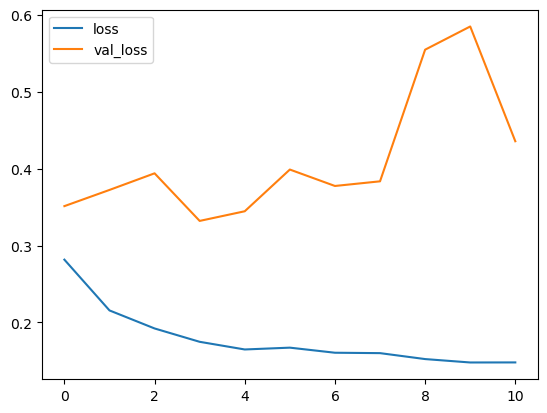

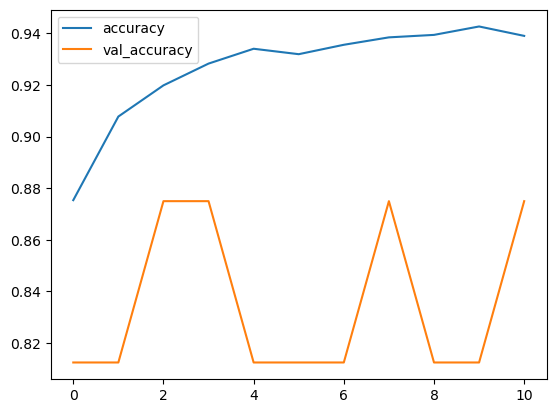

In [8]:
import pandas as pd
ef=pd.DataFrame(history2.history)
ef[['loss','val_loss']].plot()
ef[['accuracy','val_accuracy']].plot()

In [10]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

test_labels = test_data.classes
predictions = (model2.predict(test_data) > 0.5).astype("int32")

print("Classification Report:")
print(classification_report(test_labels, predictions))

print("Confusion Matrix:")
print(confusion_matrix(test_labels, predictions))

39/39 ━━━━━━━━━━━━━━━━━━━━ 39s 997ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.37      0.41       234
           1       0.66      0.73      0.69       390

    accuracy                           0.59       624
   macro avg       0.55      0.55      0.55       624
weighted avg       0.58      0.59      0.58       624

Confusion Matrix:
[[ 87 147]
 [107 283]]


39/39 ━━━━━━━━━━━━━━━━━━━━ 39s 977ms/step


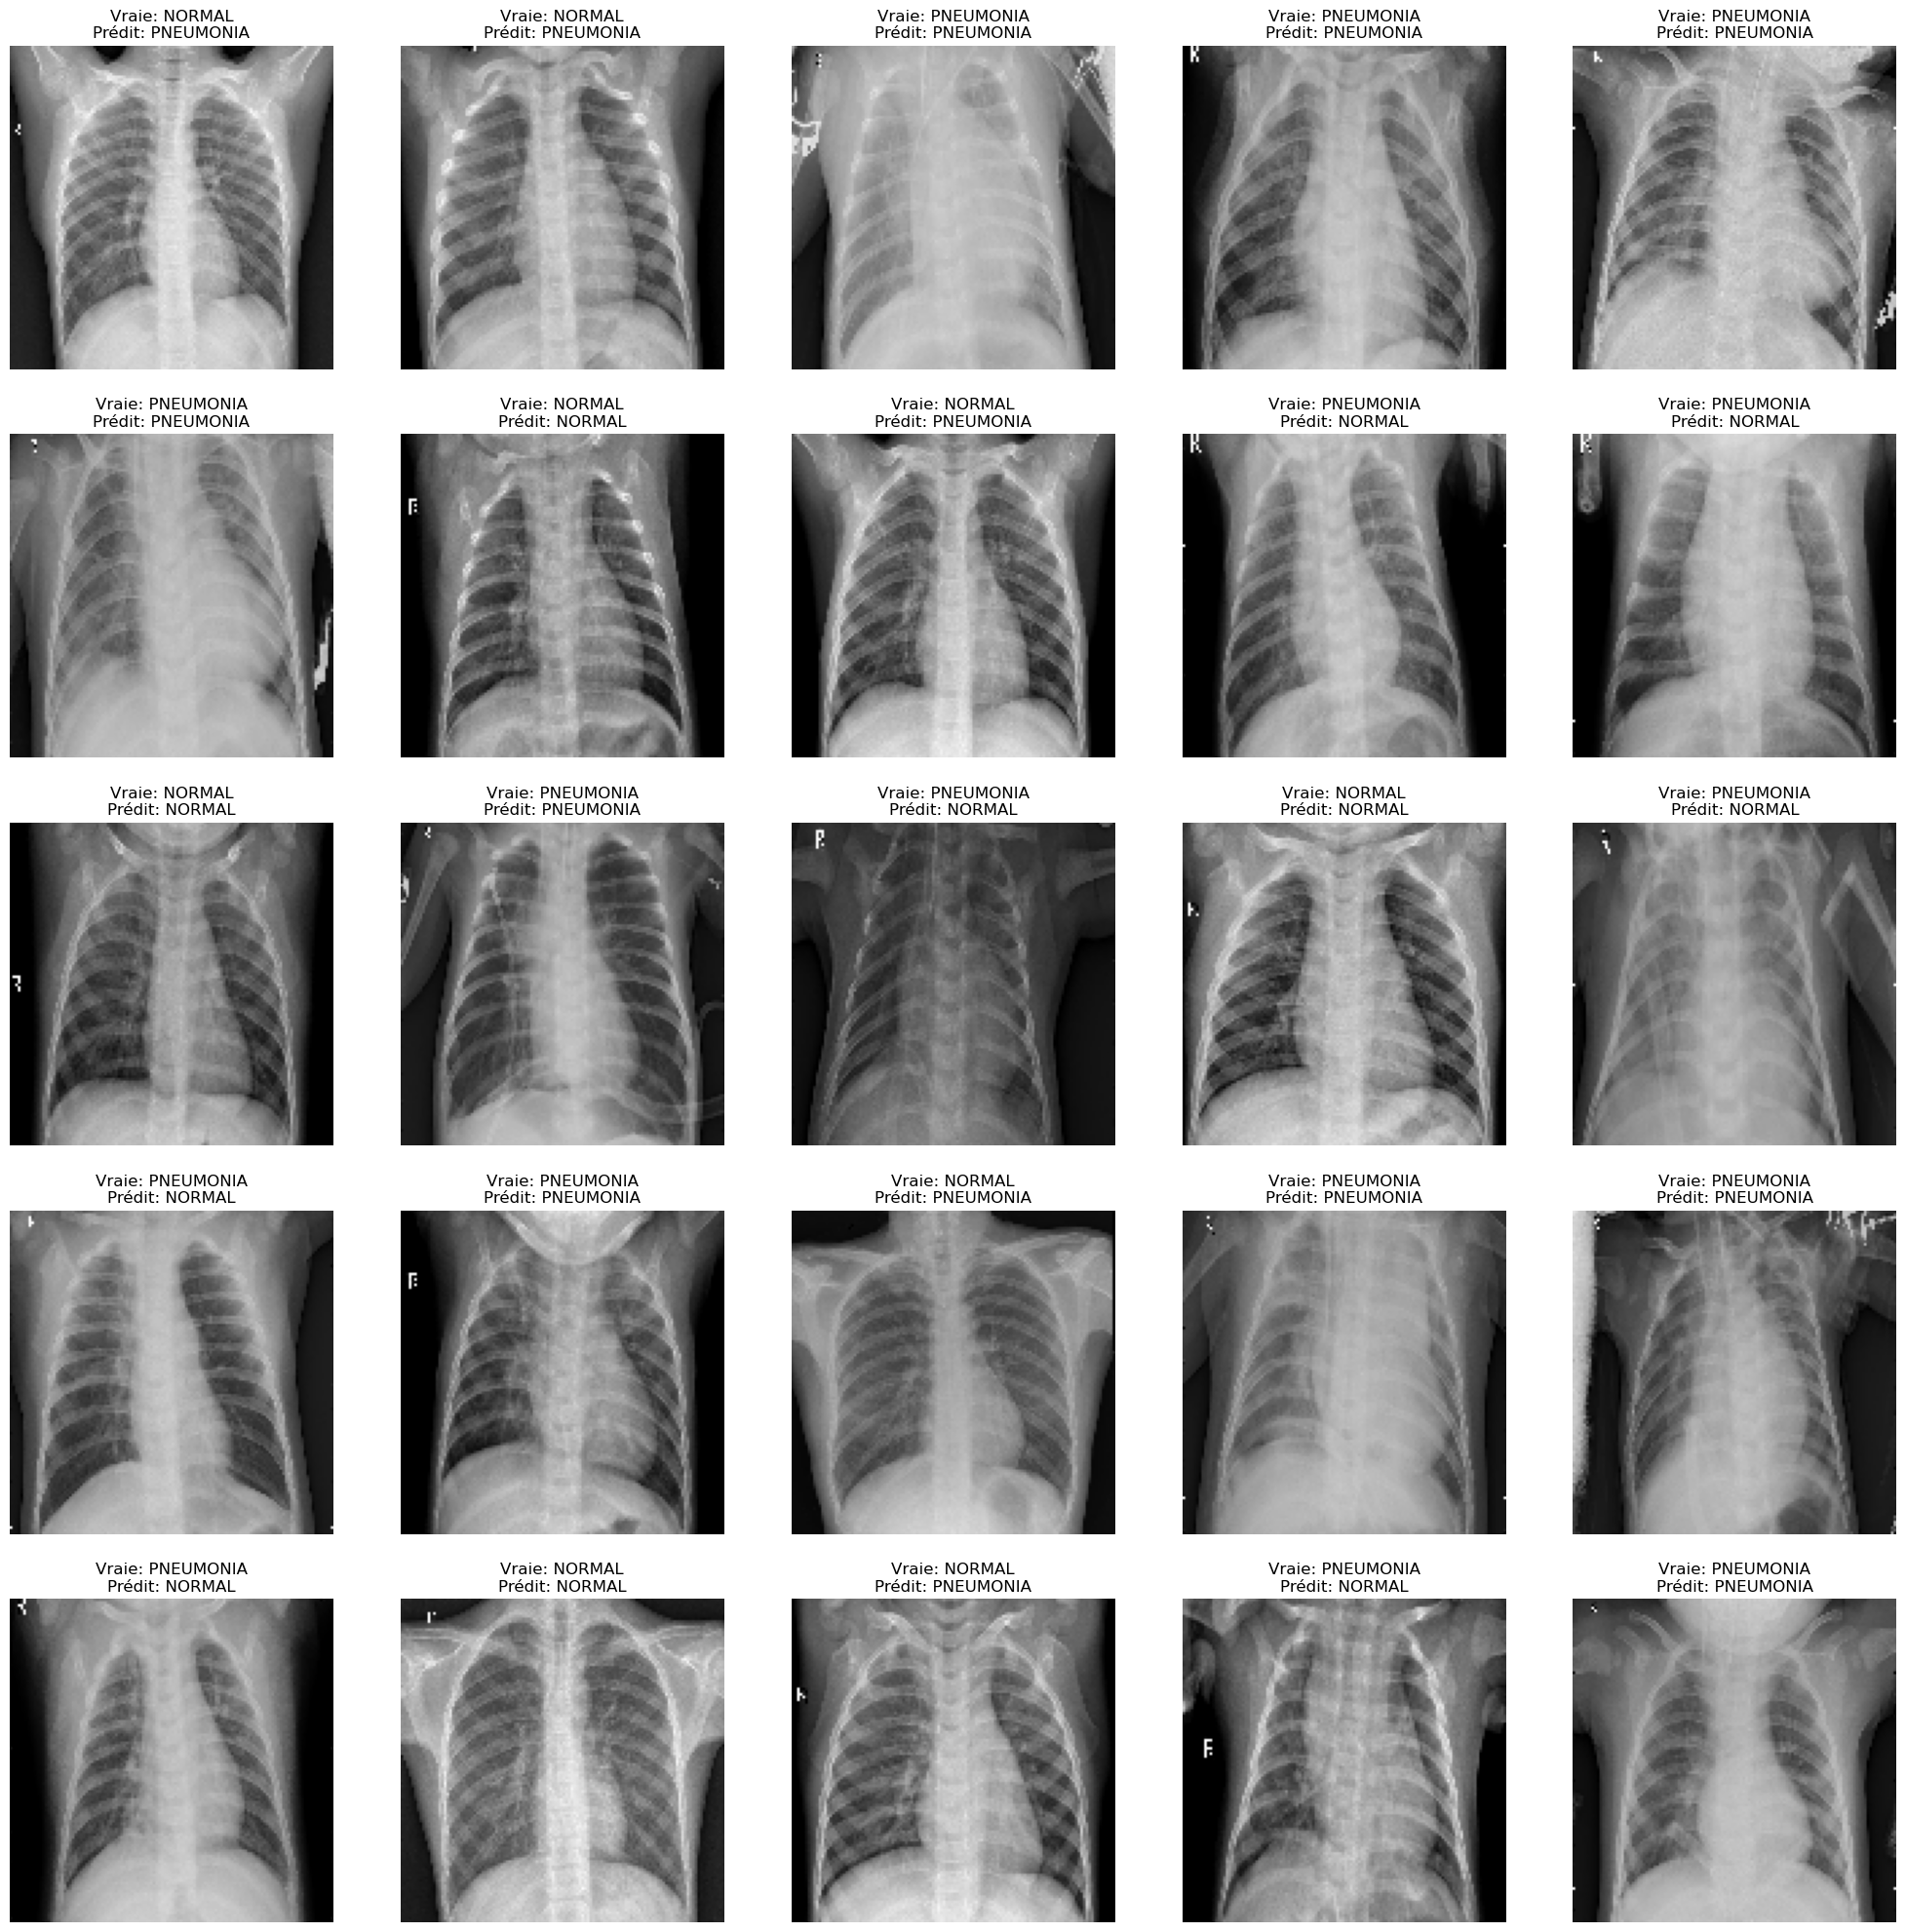

In [11]:
import matplotlib.pyplot as plt
import numpy as np

predictions = (model2.predict(test_data) > 0.5).astype("int32").flatten()
test_labels = test_data.classes
class_names = list(test_data.class_indices.keys())

plt.figure(figsize=(25, 25))
for i in range(25):
    img, label = test_data[i][0][0], int(test_data[i][1][0])  
    predicted_label = predictions[i]
    
    actual_class = class_names[label]
    predicted_class = class_names[predicted_label]
    
    plt.subplot(5, 5, i + 1)
    plt.imshow(img)
    plt.title(f"Original: {actual_class}\npredict: {predicted_class}")
    plt.axis("off")

plt.show()